# Applied Machine Learning 2024

This is an introductory piece of code, demonstrating the different ML methods that we are going to be using in the course [Applied Machine Learning 2024](https://www.nbi.dk/~petersen/Teaching/AppliedMachineLearning2024.html).

It is intended for three purposes: Illustration, checking that you have the right Python packages/setup, and finally to wet your appetite.

## Start-up Examples

Below we quickly run several basic examples to check that we have all the most relevant machine learning packages (`pandas`, `scikit-learn`, `tensorflow`, `pytorch`, among some of them).

[Scikit-Learn](https://scikit-learn.org/stable/) provides implementations of a number of machine learning algorithms, as well as [datasets](https://scikit-learn.org/stable/datasets.html) (includeing some used below).

To solve, let's say, a decision boundary problem, we can use a classifier from scikit-learn. For instance, a decision tree classifier. An illustration of one simple tree, that goes only 1 layer deep is shown below. It attempts to separate two types of objects distributed in 2D space that remind two [quarter-moons](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html) (image shown below).

In addition, we can also use `pandas` ([see here](https://pandas.pydata.org/)) to help ourselves with managing data tables, which provides a fast and handy way of working with data tables.

---

#### Authors:
- Vadim Rusakov (Niels Bohr Institute)
- Troels C. Petersen (Niels Bohr Institute)

#### Date:
- 01-04-2024 (latest update)

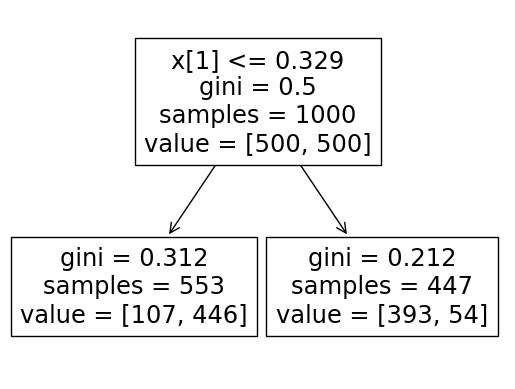

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score

# create dataset with two classes of objects in some 2D space
data_x, data_y = make_moons(n_samples=1000, noise=0.15, random_state=42)
X = pd.DataFrame(data_x, columns=['x1', 'x2'])
y = pd.Series(data_y, name='class')

# create a decision tree with some depth of 'leafs'
tree_clf = DecisionTreeClassifier(max_depth=1)
tree_clf.fit(X, y)

plot_tree(tree_clf) # visualise tree
plt.rcParams['figure.figsize'] = [10, 6]
plt.show()

In [2]:
# illustrates our data table
pd.concat([X, y], axis=1)

,x1,x2,class
0,-0.081568,0.482211,1
1,1.087333,-0.381159,1
2,0.831725,-0.133135,1
3,0.200339,-0.500300,1
4,-0.824953,0.539526,0
...,...,...,...
995,0.823239,0.481376,0
996,-0.179065,0.873266,0
997,1.705934,-0.388526,1
998,-0.990844,0.199451,0


/home/ali/miniconda3/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/home/ali/miniconda3/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


Train accuracy: 83.90%


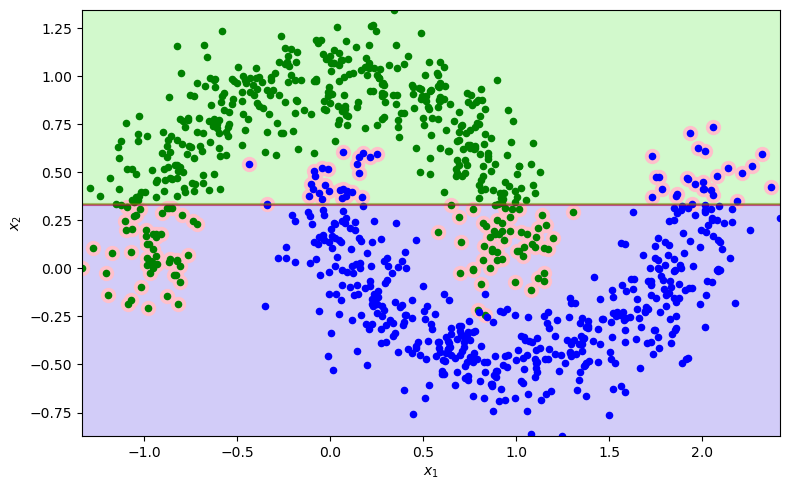

In [3]:
import numpy as np

def plot_boundary_results(X, y, clf):
    # sample the whole X space with a meshgrid of probabilities
    # predicted by out trained classifier
    xx, yy = np.meshgrid(np.linspace(X[:,0].min(), X[:,0].max(), 300),
                         np.linspace(X[:,1].min(), X[:,1].max(), 300))
    X_bkg = np.c_[xx.ravel(), yy.ravel()]
    y_bkg = clf.predict_proba(X_bkg)[:,0].reshape(xx.shape)
    y_pred = clf.predict(X)

    # plot the classification results
    fig, ax = plt.subplots(1, figsize=(8, 5))
    ax.contourf(xx, yy, y_bkg, cmap='brg', alpha=0.2) # coloured by class
    ax.contour(xx, yy, y_bkg, cmap='brg', alpha=0.2) # coloured by class
    ax.scatter(X[:,0][y_pred!=y], X[:,1][y_pred!=y], s=100, c='pink')
    ax.scatter(X[:,0][y==0], X[:,1][y==0], s=20, c='g')
    ax.scatter(X[:,0][y==1], X[:,1][y==1], s=20, c='b')
    ax.set_xlabel("$x_1$")
    ax.set_ylabel("$x_2$")
    plt.tight_layout()
    print(f"Train accuracy: {accuracy_score(y_pred, y)*100.0:.2f}%")

plot_boundary_results(X.values, y.values, tree_clf)

`XGBoost` [(Extreme Gradient Boosting)](https://xgboost.readthedocs.io/en/latest/python/python_intro.html)

XGBoost is going to come in handy in various classification and regression tasks that involve decision trees (among, for example, random forests and other boost algorithms). It represents an ensemble of decision trees that is efficient, fast and, therefore, capable of working with large datasets. XGBoost has a scikit-learn-compatible API allowing to use it with a range of learner classes.

Train accuracy: 99.80%


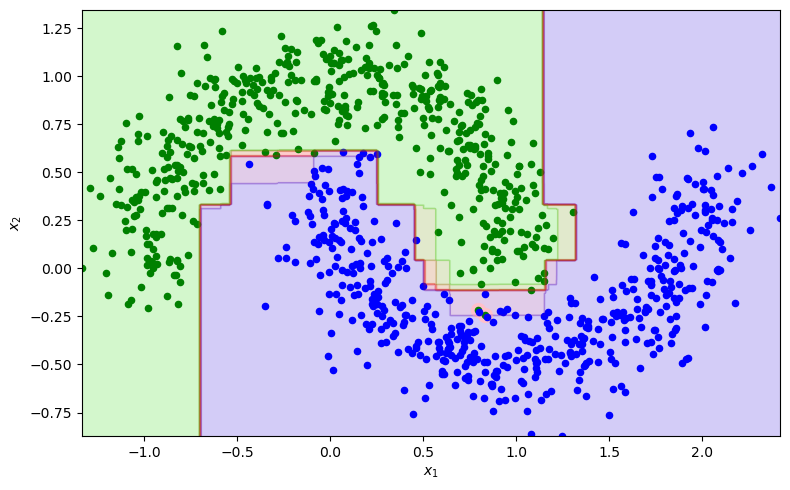

In [4]:
import xgboost as xgb

xgb_clf = xgb.XGBClassifier(objective='binary:logistic', learning_rate=0.01,
                            max_depth=10, eval_metric='logloss', n_estimators=300,
                            seed=42, use_label_encoder=False)
xgb_clf.fit(X.values, y.values)
plot_boundary_results(X.values, y.values, xgb_clf)

`LightGBM` ([homepage](https://lightgbm.readthedocs.io/en/latest/Python-Intro.html)) is another tree-based learning algorithm with gradient boosting. In contrast to analogous algorithms, it "grows" a tree not by whole rows, but rather leaf-by-leaf, allowing for a finer structure complexity and higher accuracy.

In [5]:
import lightgbm as lgb 

data_train = lgb.Dataset(X, label=y)
params = {'objective': 'binary',
          'boosting_type': 'gbdt',
          'metric': 'binary_logloss',
          'learning_rate': 0.01,
          'num_leaves': 10,
          'max_depth': 10,
          'min_data': 10,
          'verbose': 0,
          'force_col_wise': True}

lgb_clf = lgb.train(params, train_set=data_train, num_boost_round=300)
y_pred = np.around(lgb_clf.predict(X.values))
acc = accuracy_score(y_pred, y)
print(f"Train accuracy: {acc*100.0:.2f}%")

Train accuracy: 99.80%


`tensorflow` ([really nice homepage](https://www.tensorflow.org/overview/)), in turn, is most useful for using deep learning models. It provides a graph framework for performing computations with networks in C++ and easy scripting in python (versions starting from tensorflow 2 can work in 'eager' mode requiring less interaction with the graph structure). For simple tasks it can be easily interfaced with by using `keras`, which is built on top of tensorflow. This is what we do below solving a classification problem with the hand-written digits [dataset](http://yann.lecun.com/exdb/mnist/).

In [6]:
import tensorflow as tf
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam, SGD

2024-04-22 14:59:37.478775: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-22 14:59:37.487377: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-22 14:59:37.573668: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-22 14:59:38.879298: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [7]:
# load MNIST dataset to the location "~/keras/mnist.npz"
(X_train, y_train), (X_val, y_val) = tf.keras.datasets.mnist.load_data(path='mnist.npz')

# set up the network hyperparameters
n_inputs = 28 * 28
n_hidden1 = 300
n_hidden2 = 100
n_outputs = 10
batch_norm_momentum = 0.9
learning_rate = 0.001
init = tf.keras.initializers.VarianceScaling(scale=1.0, mode='fan_in')
centropy = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

# network structure
nn_reg = tf.keras.models.Sequential([
  Flatten(input_shape=(28, 28)),
  Dense(n_hidden1, activation='elu', kernel_initializer=init),
  BatchNormalization(momentum=batch_norm_momentum, center=True, scale=True),
  Dense(n_hidden2, activation='elu', kernel_initializer=init),
  BatchNormalization(momentum=batch_norm_momentum, center=True, scale=True),
  Dense(n_outputs, activation='elu', kernel_initializer=init),
  BatchNormalization(momentum=batch_norm_momentum, center=True, scale=True)
])

nn_reg.compile(loss=centropy, optimizer=SGD(learning_rate), metrics=['accuracy'])

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


/home/ali/miniconda3/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
2024-04-22 14:59:52.070495: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-04-22 14:59:52.071969: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2251] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Sk

In [8]:
n_epochs = 3
batch_size = 200

history = nn_reg.fit(X_train, y_train, epochs=n_epochs, batch_size=batch_size,
                    validation_data=(X_val, y_val))

Epoch 1/3
300/300 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.4113 - loss: 1.8136 - val_accuracy: 0.7863 - val_loss: 0.9347
Epoch 2/3
300/300 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7862 - loss: 0.9336 - val_accuracy: 0.8445 - val_loss: 0.7813
Epoch 3/3
300/300 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8406 - loss: 0.8014 - val_accuracy: 0.8711 - val_loss: 0.7012


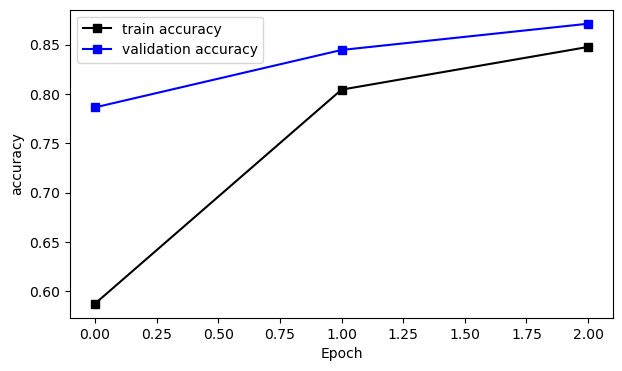

In [9]:
fig, ax = plt.subplots(1, figsize=(7, 4))
ax.plot(np.arange(n_epochs), history.history['accuracy'], 'ks-', label='train accuracy')
ax.plot(np.arange(n_epochs), history.history['val_accuracy'], 'bs-', label='validation accuracy')
ax.set_ylabel('accuracy')
ax.set_xlabel('Epoch')
ax.legend()
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


<Figure size 1000x1000 with 0 Axes>

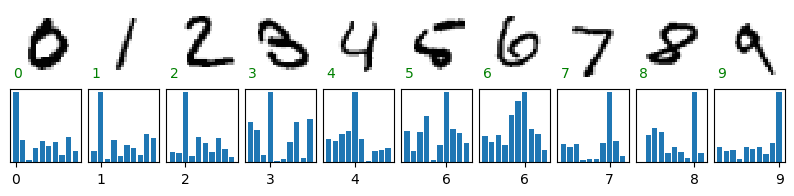

In [10]:
# here we take 10 digits from validation set and see network predictions for them
preds = nn_reg.predict(X_val)
n_digits = len(np.unique(y_val))
n = X_val.shape[-1]

plt.figure(figsize=(10,10))
fig, axes = plt.subplots(2, n_digits, figsize=(10, 2),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

# get digits from validation set in ascending order
n_images = 2 # image of a digit & weighting
#images = np.zeros([n_images * n_digits, n * n])
for i in range(n_digits):
    img =  X_val[np.where(y_val == i)][0].reshape(-1)
    loc = np.where(y_val == i)[0][0]
    img_wht = preds[loc]
    axes[0][i].imshow(img.reshape(n, n), cmap='binary', interpolation='nearest')
    axes[1][i].bar(range(10), np.abs(img_wht))
    axes[0][i].axis("off")
    axes[0][i].text(0.05, 0.05, i, transform=axes[0][i].transAxes, 
                    color='green')
    axes[1][i].set_xticks([np.argmax(img_wht)])

Finally, let us check that `pytorch` ([nice and helpful homepage too](https://pytorch.org/)) is installed with the similar example. This package has 'eager' API execution that was adopted by tensorflow 2, which makes it very native and python-like in writing scripts.

Note that this takes some time to run.

In [11]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.optim import SGD
from torchvision.datasets import CIFAR10
from torchvision import transforms

n_epochs = 10

train_set = CIFAR10('./', download=True, transform=transforms.Compose([transforms.ToTensor(),]), train=True)
trainloader = torch.utils.data.DataLoader(train_set, batch_size=1000,
                                          shuffle=True, num_workers=0)

n_inputs = 32 * 32 * 3
model = nn.Sequential(nn.Linear(n_inputs, n_hidden1),
                      nn.ReLU(),
                      nn.Linear(n_hidden1, n_hidden2),
                      nn.ReLU(),
                      nn.Linear(n_hidden2, n_outputs),
                      nn.ReLU())

criterion = nn.CrossEntropyLoss()
optimizer = SGD(model.parameters(), lr=0.01, momentum=0.9)
for j in range(n_epochs):
    current_loss = 0
    for i, data in enumerate(trainloader, 0):
        X_train_, y_train_ = data
        optimizer.zero_grad()
        y_pred = model(X_train_.reshape(-1, n_inputs))
        loss = criterion(y_pred, y_train_)
        loss.backward()  # backward learning pass
        optimizer.step()
        current_loss += loss.item()
    print(f"Epoch {j + 1} - training loss: {current_loss/len(X_train_)}")

100%|██████████| 170498071/170498071 [00:15<00:00, 11133393.12it/s]


Extracting ./cifar-10-python.tar.gz to ./
Epoch 1 - training loss: 0.1149816484451294
Epoch 2 - training loss: 0.11444469070434571
Epoch 3 - training loss: 0.11336343288421631
Epoch 4 - training loss: 0.11001107096672058
Epoch 5 - training loss: 0.10666837692260742
Epoch 6 - training loss: 0.10532705330848693
Epoch 7 - training loss: 0.10434207010269166
Epoch 8 - training loss: 0.10312196469306946
Epoch 9 - training loss: 0.10197094881534577
Epoch 10 - training loss: 0.10095641100406647
